# **Stock Price Prediction**

---



**Importing the libraries**

---



In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fbprophet as Prophet

**Importing the dataset**

---



In [29]:
stock_data = pd.read_csv('RELIANCE.csv')

In [30]:
stock_data.head(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [31]:
stock_data = stock_data[['Date', 'VWAP']]
stock_data.head(5)

,Date,VWAP
0,2000-01-03,249.37
1,2000-01-04,263.52
2,2000-01-05,274.79
3,2000-01-06,295.45
4,2000-01-07,308.91


**Data Processing**

---



In [32]:
stock_data.set_index('Date', drop=False, inplace=True)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


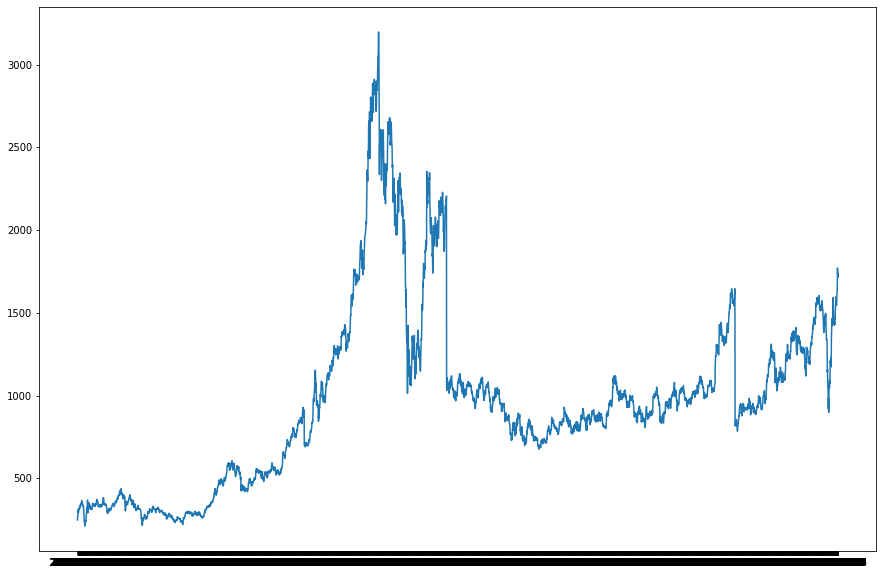

In [33]:
plt.figure(figsize=(15, 10))
plt.plot(stock_data.VWAP)

In [34]:
stock_data.Date = pd.to_datetime(stock_data.Date, format="%Y-%m-%d")
stock_data["month"] = stock_data.Date.dt.month
stock_data["week"] = stock_data.Date.dt.week
stock_data["day"] = stock_data.Date.dt.day
stock_data["day of week"] = stock_data.Date.dt.dayofweek
stock_data.head()

,Date,VWAP,month,week,day,day of week
Date,,,,,,
2000-01-03,2000-01-03,249.37,1,1,3,0
2000-01-04,2000-01-04,263.52,1,1,4,1
2000-01-05,2000-01-05,274.79,1,1,5,2
2000-01-06,2000-01-06,295.45,1,1,6,3
2000-01-07,2000-01-07,308.91,1,1,7,4


In [47]:
stock_data_final = stock_data.rename(columns={'Date' : 'ds', 'VWAP' : 'y'})

**Training the model**

---



In [48]:
model = Prophet.Prophet()
model.fit(stock_data_final)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
future = model.make_future_dataframe(periods=730)
forecast = model.predict(future)

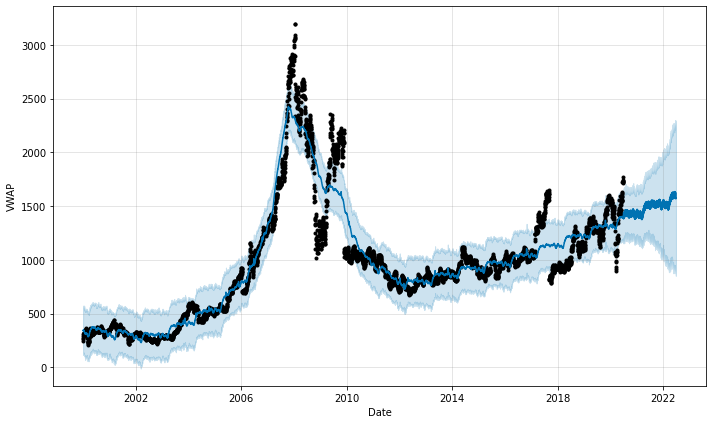

In [50]:
chart = model.plot(forecast, xlabel= 'Date', ylabel= 'VWAP')

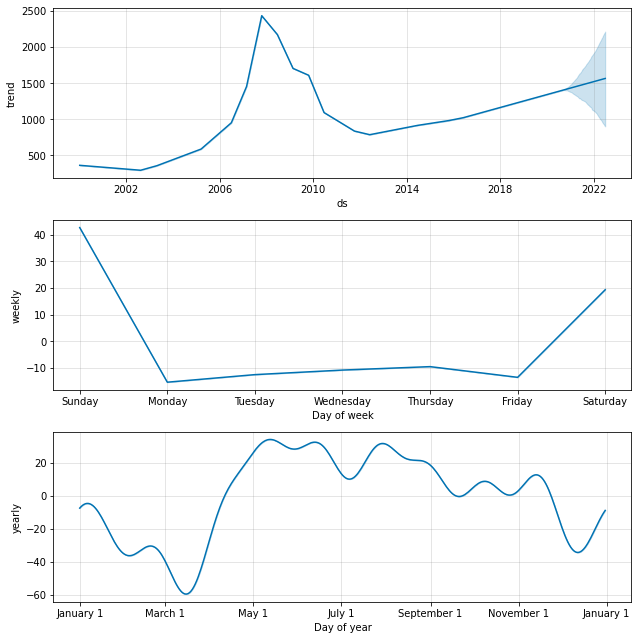

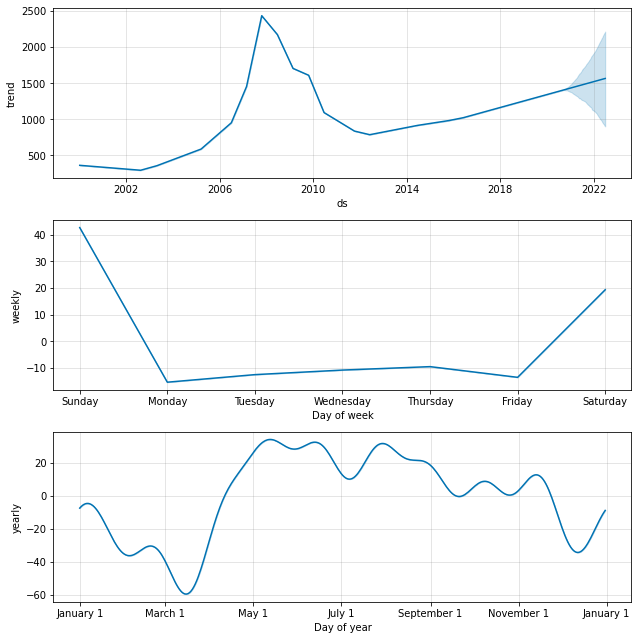

In [51]:
model.plot_components(forecast)